# Importing Libraries

In [1]:
import os
import math 
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.2)

warnings.filterwarnings('ignore')

# Data Preparation

## Reading Data

In [2]:
files_list = next(os.walk('Data'))[2]
print(files_list)

['audi.csv', 'bmw.csv', 'ford.csv', 'hyundi.csv', 'merc.csv', 'skoda.csv', 'toyota.csv', 'vauxhall.csv', 'vw.csv']


In [3]:
audi = pd.read_csv("Data/audi.csv")
audi["company"] = "Audi"
audi = audi.drop(["tax", "mpg"], axis=1)
audi

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,1.0,Audi
...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,1.0,Audi
10664,A3,2020,16999,Manual,1978,Petrol,1.0,Audi
10665,A3,2020,17199,Manual,609,Petrol,1.0,Audi
10666,Q3,2017,19499,Automatic,8646,Petrol,1.4,Audi


In [4]:
bmw = pd.read_csv("Data/bmw.csv")
bmw["company"] = "BMW"
bmw = bmw.drop(["tax", "mpg"], axis=1)
bmw

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,5 Series,2014,11200,Automatic,67068,Diesel,2.0,BMW
1,6 Series,2018,27000,Automatic,14827,Petrol,2.0,BMW
2,5 Series,2016,16000,Automatic,62794,Diesel,3.0,BMW
3,1 Series,2017,12750,Automatic,26676,Diesel,1.5,BMW
4,7 Series,2014,14500,Automatic,39554,Diesel,3.0,BMW
...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,2.0,BMW
10777,5 Series,2016,14600,Automatic,42947,Diesel,2.0,BMW
10778,3 Series,2017,13100,Manual,25468,Petrol,2.0,BMW
10779,1 Series,2014,9930,Automatic,45000,Diesel,2.0,BMW


In [5]:
ford = pd.read_csv("Data/ford.csv")
ford["company"] = "Ford"
ford

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,Fiesta,2017,12000,Automatic,15944,Petrol,1.0,Ford
1,Focus,2018,14000,Manual,9083,Petrol,1.0,Ford
2,Focus,2017,13000,Manual,12456,Petrol,1.0,Ford
3,Fiesta,2019,17500,Manual,10460,Petrol,1.5,Ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,1.0,Ford
...,...,...,...,...,...,...,...,...
23414,Focus,2019,18745,Manual,7855,Diesel,2.0,Ford
23415,Focus,2019,16350,Manual,13891,Petrol,1.0,Ford
23416,Focus,2019,16850,Manual,13452,Petrol,1.0,Ford
23417,Focus,2019,17310,Automatic,13376,Petrol,1.0,Ford


In [6]:
hyundi = pd.read_csv("Data/hyundi.csv")
hyundi["company"] = "Hyundi"
hyundi = hyundi.drop(["tax(£)", "mpg"], axis=1)
hyundi

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,I20,2017,7999,Manual,17307,Petrol,1.2,Hyundi
1,Tucson,2016,14499,Automatic,25233,Diesel,2.0,Hyundi
2,Tucson,2016,11399,Manual,37877,Diesel,1.7,Hyundi
3,I10,2016,6499,Manual,23789,Petrol,1.0,Hyundi
4,IX35,2015,10199,Manual,33177,Diesel,2.0,Hyundi
...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,1.6,Hyundi
4856,I40,2015,7830,Manual,59508,Diesel,1.7,Hyundi
4857,I10,2017,6830,Manual,13810,Petrol,1.0,Hyundi
4858,Tucson,2018,13994,Manual,23313,Petrol,1.6,Hyundi


In [7]:
merc = pd.read_csv("Data/merc.csv")
merc["company"] = "Mercedes"
merc

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,SLK,2005,5200,Automatic,63000,Petrol,1.8,Mercedes
1,S Class,2017,34948,Automatic,27000,Hybrid,2.1,Mercedes
2,SL CLASS,2016,49948,Automatic,6200,Petrol,5.5,Mercedes
3,G Class,2016,61948,Automatic,16000,Petrol,4.0,Mercedes
4,G Class,2016,73948,Automatic,4000,Petrol,4.0,Mercedes
...,...,...,...,...,...,...,...,...
17013,C Class,2017,14700,Manual,31357,Diesel,1.6,Mercedes
17014,C Class,2018,18500,Automatic,28248,Diesel,2.1,Mercedes
17015,C Class,2014,11900,Manual,48055,Diesel,2.1,Mercedes
17016,C Class,2014,11300,Automatic,49865,Diesel,2.1,Mercedes


In [8]:
skoda = pd.read_csv("Data/skoda.csv")
skoda["company"] = "Skoda"
skoda = skoda.drop(["tax", "mpg"], axis=1)
skoda

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,Octavia,2017,10550,Manual,25250,Petrol,1.4,Skoda
1,Citigo,2018,8200,Manual,1264,Petrol,1.0,Skoda
2,Octavia,2019,15650,Automatic,6825,Diesel,2.0,Skoda
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,2.0,Skoda
4,Superb,2019,18350,Manual,10912,Petrol,1.5,Skoda
...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,1.2,Skoda
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,1.4,Skoda
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,1.0,Skoda
6265,Citigo,2016,5999,Manual,21747,Petrol,1.0,Skoda


In [9]:
toyota = pd.read_csv("Data/toyota.csv")
toyota["company"] = "Toyota"
toyota = toyota.drop(["tax", "mpg"], axis=1)
toyota

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,GT86,2016,16000,Manual,24089,Petrol,2.0,Toyota
1,GT86,2017,15995,Manual,18615,Petrol,2.0,Toyota
2,GT86,2015,13998,Manual,27469,Petrol,2.0,Toyota
3,GT86,2017,18998,Manual,14736,Petrol,2.0,Toyota
4,GT86,2017,17498,Manual,36284,Petrol,2.0,Toyota
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,1.0,Toyota
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,1.3,Toyota
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,1.4,Toyota
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,1.3,Toyota


In [10]:
vauxhall = pd.read_csv("Data/vauxhall.csv")
vauxhall["company"] = "Vauxhall"
vauxhall = vauxhall.drop(["tax", "mpg"], axis=1)
vauxhall

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,Corsa,2018,7885,Manual,9876,Petrol,1.4,Vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,1.4,Vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,1.4,Vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,1.4,Vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,1.4,Vauxhall
...,...,...,...,...,...,...,...,...
13627,Tigra,2007,2499,Manual,48640,Petrol,1.4,Vauxhall
13628,Vectra,2007,1795,Manual,75000,Petrol,1.8,Vauxhall
13629,Vectra,2005,1495,Manual,74000,Petrol,1.8,Vauxhall
13630,Vectra,2008,1695,Automatic,131000,Diesel,1.9,Vauxhall


In [11]:
vw = pd.read_csv("Data/vw.csv")
vw["company"] = "Volkswagen"
vw = vw.drop(["tax", "mpg"], axis=1)
vw

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,T-Roc,2019,25000,Automatic,13904,Diesel,2.0,Volkswagen
1,T-Roc,2019,26883,Automatic,4562,Diesel,2.0,Volkswagen
2,T-Roc,2019,20000,Manual,7414,Diesel,2.0,Volkswagen
3,T-Roc,2019,33492,Automatic,4825,Petrol,2.0,Volkswagen
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,1.5,Volkswagen
...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,2.0,Volkswagen
15153,Fox,2008,1799,Manual,88102,Petrol,1.2,Volkswagen
15154,Fox,2009,1590,Manual,70000,Petrol,1.4,Volkswagen
15155,Fox,2006,1250,Manual,82704,Petrol,1.2,Volkswagen


## Combining Data

In [12]:
full_data = pd.concat([audi, bmw, ford, hyundi, merc, skoda, toyota, vauxhall, vw])
full_data

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,1.0,Audi
...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,2.0,Volkswagen
15153,Fox,2008,1799,Manual,88102,Petrol,1.2,Volkswagen
15154,Fox,2009,1590,Manual,70000,Petrol,1.4,Volkswagen
15155,Fox,2006,1250,Manual,82704,Petrol,1.2,Volkswagen


## Data Cleaning

Checking for any null value

In [13]:
full_data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
company         0
dtype: int64

Checking the shape of our data

In [14]:
full_data.shape

(108540, 8)

#### Checking Statistics of Data

In [15]:
full_data.describe()

,year,price,mileage,engineSize
count,108540.000000,108540.000000,108540.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,1.661644
std,2.130057,9756.266820,21176.423684,0.557058
min,1970.000000,450.000000,1.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,1.200000
50%,2017.000000,14698.000000,17265.000000,1.600000
75%,2019.000000,20940.000000,32236.000000,2.000000
max,2060.000000,159999.000000,323000.000000,6.600000


It seems that there are some outiers, as we can see the data should be upto 2020 ony

Checking Outliers in coumn year

<AxesSubplot:xlabel='year'>

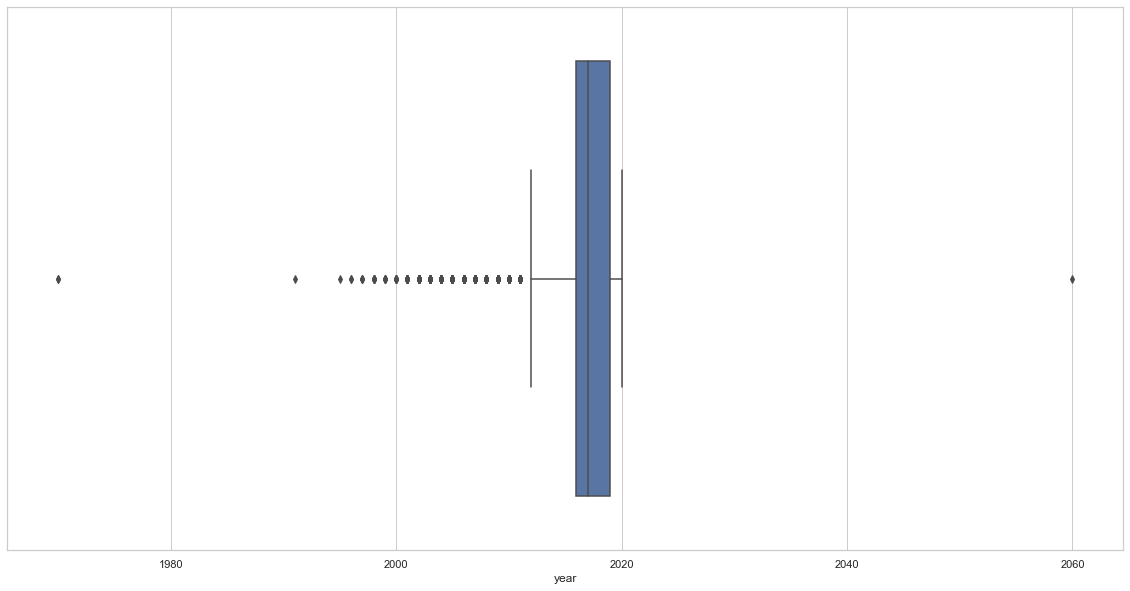

In [16]:
sns.set(style="whitegrid")
sns.boxplot(x =full_data['year'])

Removing indexes where Year is greater than 2020

In [17]:
index_list = (full_data.loc[full_data['year'] > 2020]).index
full_data = full_data.drop(index_list)

In [18]:
full_data.shape

(108539, 8)

## Data Visualization

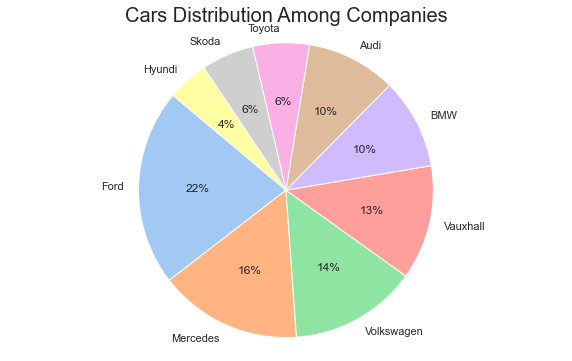

In [19]:
# Pie Chart: Distribution of Cars Among Companies
pie = full_data["company"].value_counts().reset_index()
pie.columns = ["company", "count"]

plt.figure(figsize=(10, 6))
plt.pie(
    pie["count"],
    colors=sns.color_palette("pastel"),
    autopct='%.0f%%',
    labels=pie["company"],
    startangle=140
)
plt.title("Cars Distribution Among Companies", size=20)
plt.axis('equal')
plt.show()


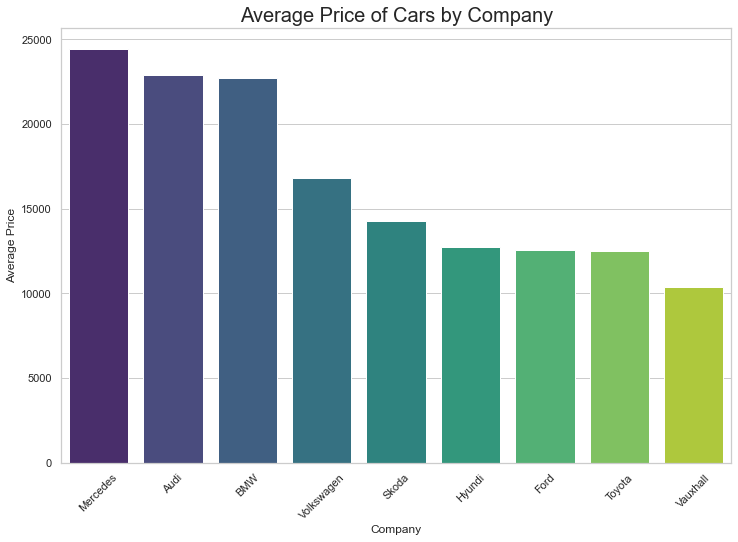

In [20]:
# Bar Plot: Average Price of Cars by Company
avg_price = full_data.groupby("company")["price"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x="company", y="price", data=avg_price, palette="viridis")
plt.title("Average Price of Cars by Company", size=20)
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


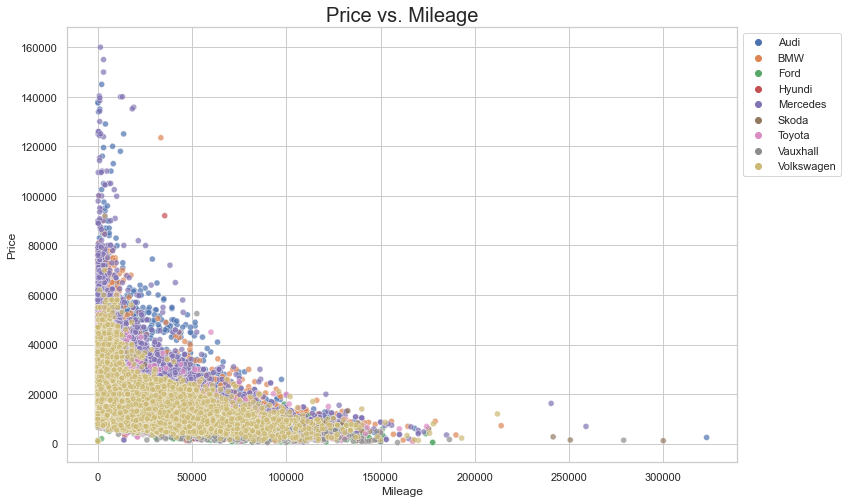

In [21]:
# Scatter Plot: Price vs. Mileage
plt.figure(figsize=(12, 8))
sns.scatterplot(x="mileage", y="price", hue="company", data=full_data, palette="deep", alpha=0.7)
plt.title("Price vs. Mileage", size=20)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


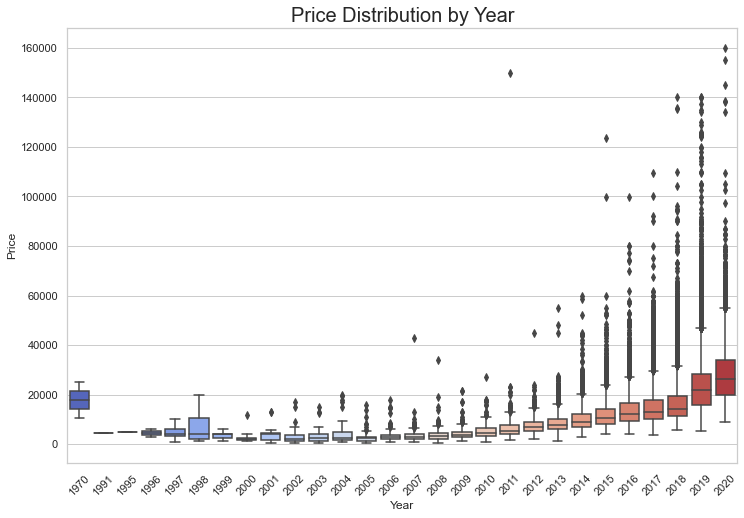

In [22]:
# Box Plot: Price Distribution by Year
plt.figure(figsize=(12, 8))
sns.boxplot(x="year", y="price", data=full_data, palette="coolwarm")
plt.title("Price Distribution by Year", size=20)
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


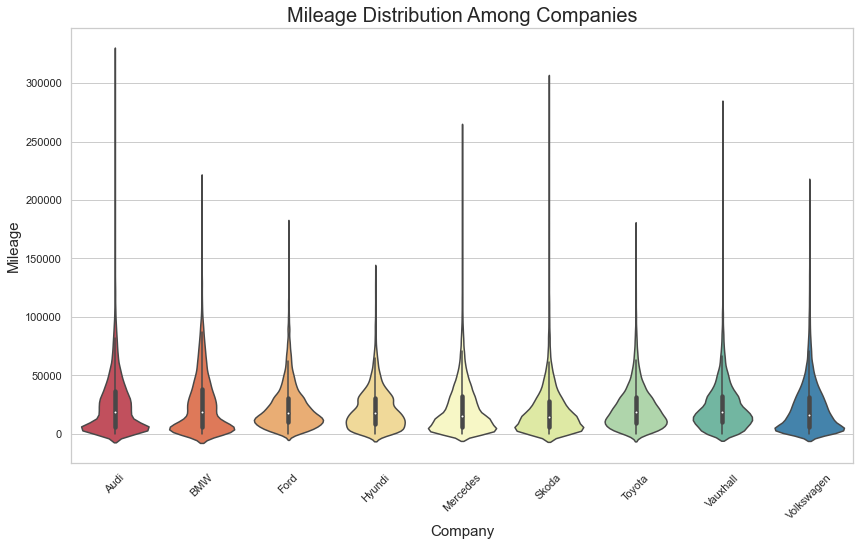

In [23]:
# Violin Plot: Mileage by Company
plt.figure(figsize=(14, 8))
sns.violinplot(data=full_data, x="company", y="mileage", palette="Spectral")
plt.title("Mileage Distribution Among Companies", size=20)
plt.xlabel("Company", size=15)
plt.ylabel("Mileage", size=15)
plt.xticks(rotation=45)
plt.show()


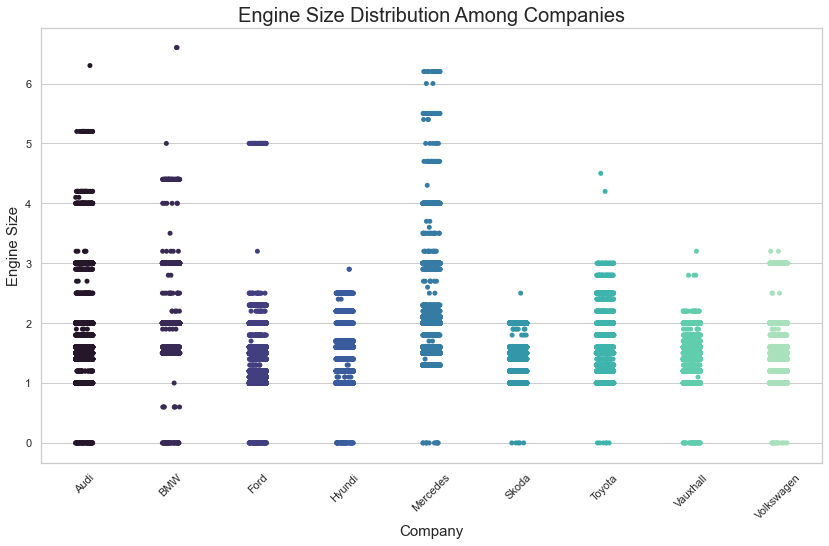

In [24]:
# Strip Plot: Engine Size by Company
plt.figure(figsize=(14, 8))
sns.stripplot(data=full_data, x="company", y="engineSize", palette="mako", jitter=True, size=5)
plt.title("Engine Size Distribution Among Companies", size=20)
plt.xlabel("Company", size=15)
plt.ylabel("Engine Size", size=15)
plt.xticks(rotation=45)
plt.show()


Coorelation Plot

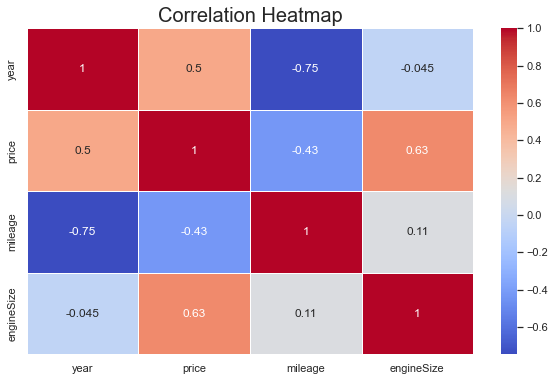

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = full_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", size=20)
plt.show()


## Encoding Categorial Variables

Making Copy of the orignal prepares data, and using it further

In [26]:
data = full_data
data

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,1.0,Audi
...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,2.0,Volkswagen
15153,Fox,2008,1799,Manual,88102,Petrol,1.2,Volkswagen
15154,Fox,2009,1590,Manual,70000,Petrol,1.4,Volkswagen
15155,Fox,2006,1250,Manual,82704,Petrol,1.2,Volkswagen


In [27]:
label_encoder = preprocessing.LabelEncoder()
data['model']= label_encoder.fit_transform(data['model']) 
data['transmission']= label_encoder.fit_transform(data['transmission']) 
data['fuelType']= label_encoder.fit_transform(data['fuelType']) 
data['company']= label_encoder.fit_transform(data['company']) 
data

,model,year,price,transmission,mileage,fuelType,engineSize,company
0,9,2017,12500,1,15735,4,1.4,0
1,14,2016,16500,0,36203,0,2.0,0
2,9,2016,11000,1,29946,4,1.4,0
3,12,2017,16800,0,25952,0,2.0,0
4,11,2019,17300,1,1998,4,1.0,0
...,...,...,...,...,...,...,...,...
15152,57,2012,5990,1,74000,0,2.0,8
15153,62,2008,1799,1,88102,4,1.2,8
15154,62,2009,1590,1,70000,4,1.4,8
15155,62,2006,1250,1,82704,4,1.2,8


## Spliting Data

####  Spliting Data in to X and y

In [28]:
X = data[['model','year','transmission','mileage','fuelType','engineSize','company']]
X

,model,year,transmission,mileage,fuelType,engineSize,company
0,9,2017,1,15735,4,1.4,0
1,14,2016,0,36203,0,2.0,0
2,9,2016,1,29946,4,1.4,0
3,12,2017,0,25952,0,2.0,0
4,11,2019,1,1998,4,1.0,0
...,...,...,...,...,...,...,...
15152,57,2012,1,74000,0,2.0,8
15153,62,2008,1,88102,4,1.2,8
15154,62,2009,1,70000,4,1.4,8
15155,62,2006,1,82704,4,1.2,8


## Scaling Data Using MinMaxScaler()

In [29]:
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X

,model,year,transmission,mileage,fuelType,engineSize,company
0,0.046392,0.94,0.333333,0.048712,1.0,0.212121,0.0
1,0.072165,0.92,0.000000,0.112081,0.0,0.303030,0.0
2,0.046392,0.92,0.333333,0.092709,1.0,0.212121,0.0
3,0.061856,0.94,0.000000,0.080344,0.0,0.303030,0.0
4,0.056701,0.98,0.333333,0.006183,1.0,0.151515,0.0
...,...,...,...,...,...,...,...
108534,0.293814,0.84,0.333333,0.229100,0.0,0.303030,1.0
108535,0.319588,0.76,0.333333,0.272759,1.0,0.181818,1.0
108536,0.319588,0.78,0.333333,0.216716,1.0,0.212121,1.0
108537,0.319588,0.72,0.333333,0.256047,1.0,0.181818,1.0


In [30]:
y = data[['price']]
y

,price
0,12500
1,16500
2,11000
3,16800
4,17300
...,...
15152,5990
15153,1799
15154,1590
15155,1250


## Spliting data in to Test Data and Train Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Training and Evaluating Regression Model

## Decision Tree Regression

### Model Training

In [32]:
DT_model = DecisionTreeRegressor(max_depth=18,min_samples_split=20)
DT_model.fit(X_train, y_train)
DT_pred = DT_model.predict(X_test)

Making a new Data Frame with Predicted and Actual Values in Test Data 

In [33]:
DT_pred_plot = pd.DataFrame()
DT_pred_plot['Actula'] = y_test['price']
DT_pred_plot['DT_pred'] = DT_pred
DT_pred_plot

,Actula,DT_pred
7097,8499,8564.600000
5562,7490,6422.074074
9333,14399,13610.529412
1332,12290,12392.647059
12717,13698,15058.764706
...,...,...
12286,10260,11129.066667
4486,7989,7760.571116
8174,12640,11552.941176
2464,5495,7899.562500


### Visualizing Results

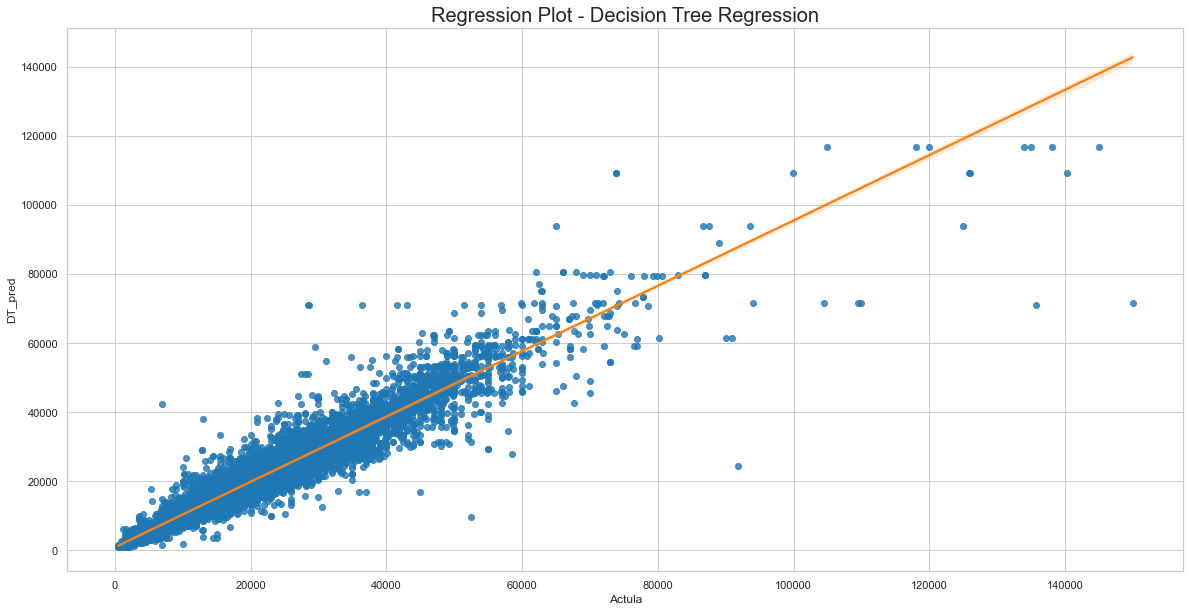

In [34]:
ax = sns.regplot(x="Actula", y="DT_pred", data=DT_pred_plot,
                 scatter_kws={"color": "#1F77B4"}, line_kws={"color": "#FF7F0E"})
plt.title("Regression Plot - Decision Tree Regression", size=20)
plt.show()

### Model Evaluation 

#### Mean Absolute Error (MAE)

In [35]:
DT_MAE = mean_absolute_error(y_test, DT_pred)
DT_MAE

1506.5037329540282

#### Mean Square Error (MSE)

In [36]:
DT_MSE = mean_squared_error(y_test, DT_pred)
DT_MSE

6872827.1217438

#### Root Mean Square Error (RMSE)

In [37]:
DT_RMSE = math.sqrt(DT_MSE) 
DT_RMSE

2621.607736055072

#### R-2 Score

In [38]:
DT_R2_Score = r2_score(y_test, DT_pred)
DT_R2_Score

0.9277961242749941

## Gradient Boosting Regression

### Model Training

In [40]:
GB_model = GradientBoostingRegressor(learning_rate=0.04, subsample=0.1, n_estimators=300, max_depth=20)
GB_model.fit(X_train, y_train)
GB_pred = GB_model.predict(X_test)

Making a new Data Frame with Predicted and Actual Values in Test Data 

In [41]:
GB_pred_plot = pd.DataFrame()
GB_pred_plot['Actula'] = y_test['price']
GB_pred_plot['GB_pred'] = GB_pred
GB_pred_plot

,Actula,GB_pred
7097,8499,8842.499147
5562,7490,7221.898487
9333,14399,13565.378051
1332,12290,12432.269332
12717,13698,15630.828497
...,...,...
12286,10260,10837.281059
4486,7989,7467.467006
8174,12640,12719.368475
2464,5495,7342.022947


### Visualizing Results

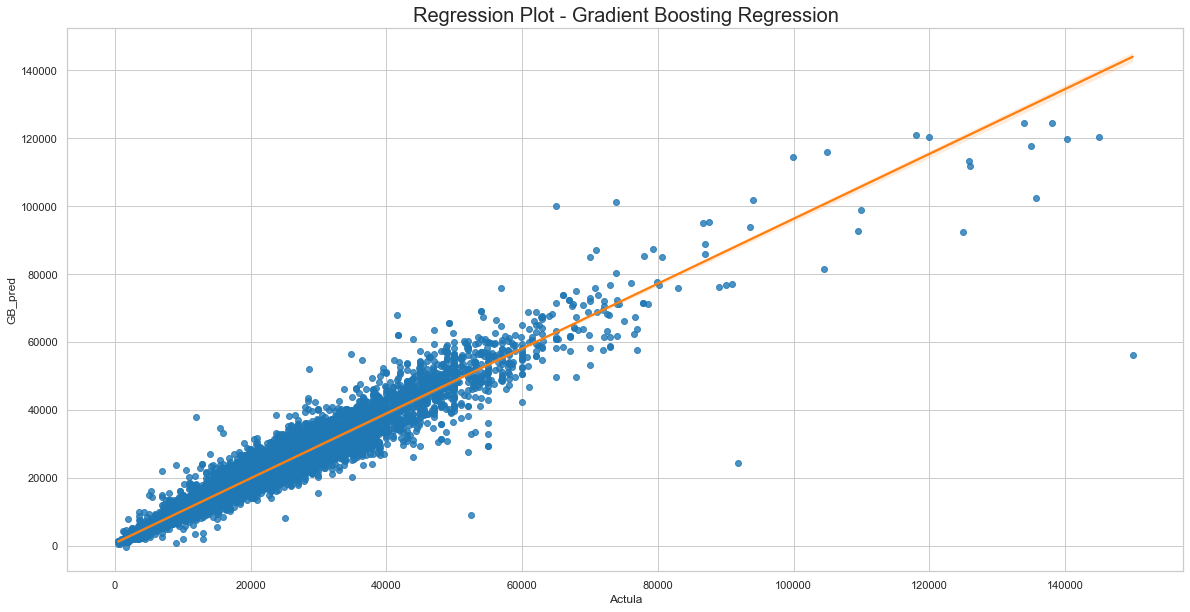

In [42]:
ax = sns.regplot(x="Actula", y="GB_pred", data=GB_pred_plot,
                 scatter_kws={"color": "#1F77B4"}, line_kws={"color": "#FF7F0E"})
plt.title("Regression Plot - Gradient Boosting Regression", size=20)
plt.show()

### Model Evaluation 

#### Mean Absolute Error (MAE)

In [43]:
GB_MAE = mean_absolute_error(y_test, GB_pred)
GB_MAE

1370.210266432155

#### Mean Square Error (MSE)

In [44]:
GB_MSE = mean_squared_error(y_test, GB_pred)
GB_MSE

5200857.816112878

#### Root Mean Square Error (RMSE)

In [45]:
GB_RMSE = math.sqrt(GB_MSE) 
GB_RMSE

2280.5389310671453

#### R-2 Score

In [46]:
GB_R2_Score = r2_score(y_test, GB_pred)
GB_R2_Score

0.9453613360606747

## Linear Regression

### Model Training

In [47]:
LR_model = LinearRegression(fit_intercept=True, positive=False)
LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)

Making a new Data Frame with Predicted and Actual Values in Test Data 

In [48]:
LR_pred_plot = pd.DataFrame()
LR_pred_plot['Actual'] = y_test['price']
LR_pred_plot['LR_pred'] = LR_pred
LR_pred_plot

,Actual,LR_pred
7097,8499,11323.993785
5562,7490,6440.489847
9333,14399,17515.621406
1332,12290,20727.363997
12717,13698,20455.729311
...,...,...
12286,10260,12477.229141
4486,7989,8427.779093
8174,12640,11918.893201
2464,5495,8261.577727


### Visualizing Results

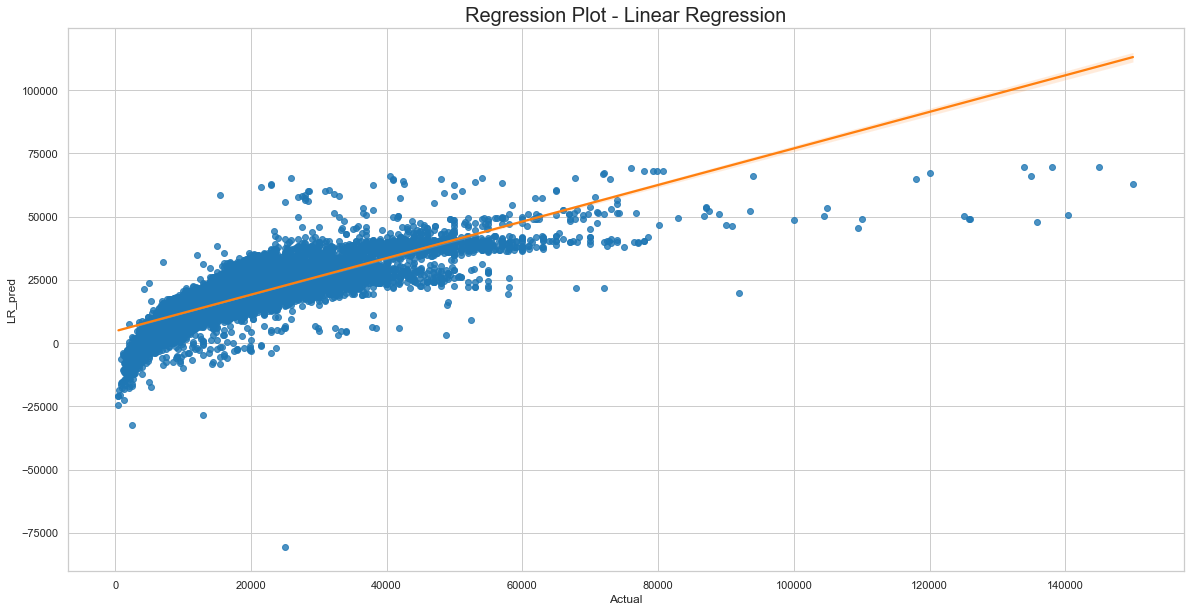

In [49]:
ax = sns.regplot(x="Actual", y="LR_pred", data=LR_pred_plot,
                 scatter_kws={"color": "#1F77B4"}, line_kws={"color": "#FF7F0E"})
plt.title("Regression Plot - Linear Regression", size=20)
plt.show()

### Model Evaluation 

#### Mean Absolute Error (MAE)

In [50]:
LR_MAE = mean_absolute_error(y_test, LR_pred)
LR_MAE

3470.9501557926615

#### Mean Square Error (MSE)

In [51]:
LR_MSE = mean_squared_error(y_test, LR_pred)
LR_MSE

26970995.096662473

#### Root Mean Square Error (RMSE)

In [52]:
LR_RMSE = math.sqrt(LR_MSE) 
LR_RMSE

5193.360674617398

#### R-2 Score

In [53]:
LR_R2_Score = r2_score(y_test, LR_pred)
LR_R2_Score

0.7166507546831682

In [ ]:
SVR_R2_Score = r2_score(y_test, SVR_pred)
SVR_R2_Score